In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time
import scipy as sp
import pre_processing

verbose = True

# ----------------
#  BASE MODEL
# ----------------

def basemodel(N_sat, N_cities, N_grid, population, coverage):
    """
    N_sat:      number of satellites to place
    N_cities:   number of cities
    N_grid:     number of grid points (possible satellite positions)
    population: numpy array of size N_cities containing the population of each city
    coverage:   binary numpy array of size N_cities x N_grid containing the coverage of each city by each satellite:
                coverage[i][j] == 1 if city i is covered by satellite j, 0 otherwise
    """
    
    # Variables
    y = cp.Variable(N_cities, name="y", boolean=True) # y[i] = 1 si ville i est couverte par un satellite, 0 sinon
    x = cp.Variable(N_grid, name="x", boolean=True)   # x[j] = 1 si satellite placé à la position j, 0 sinon

    # Objectif
    cout = cp.multiply(population, y) # population couverte (multiplication elementwise)
    objectif = cp.Maximize(cp.sum(cout)) # maximise la norme 1 (somme) des populations couvertes

    # Contraintes
    contraintes = []

    # N satellites
    contraintes.append(cp.sum(x) <= N_sat)
    
    # Couverture
    for i in range(N_cities):
        vec_couverture = np.zeros(N_grid, dtype=bool)
        vec_couverture[coverage[i]] = True
        
        contraintes.append(y[i] <= cp.sum(cp.multiply(x, vec_couverture)))

    # Debug: voir si les contraintes respectent les DCP rules
    if verbose:
        for i in range(len(contraintes)):
            if not (contraintes[i].is_dcp()):
                print("Contrainte", i, "ne respecte pas DCP rules")

    # Solveur problème
    return cp.Problem(objectif, contraintes)

# -------------------


In [3]:


data_names = ["../geonames_be.csv"]   # <-- Mettre ici les noms des fichiers csv à tester
N_experiences = len(data_names)


N_sat = 6
radius = 0.4*100.2
grid_size_X = 30
grid_size_Y = 30



j = 0

# Preprocessing
startpre = time.time()
cities, grid = pre_processing.calc_grid(data_names[j], grid_size_X, grid_size_Y)
N_cities = len(cities)
N_grid = len(grid) * len(grid[0])

population = [cities[i][2] for i in range(len(cities))]

covered_adj = pre_processing.calc_adj(cities=cities, grid=grid, radius=radius)  
endpre = time.time()

print("Preprocessing time:", endpre - startpre)

Preprocessing time: 29.705865621566772


In [15]:

save_x = []
save_y = []
save_sol = []
save_times = []

all_sats = [1,2,3,4,5,6,7,8,9,10]

for j, N_sat in enumerate(all_sats):
    startsolve = time.time()
    problem = basemodel(N_sat, N_cities, N_grid, population, covered_adj)
    problem.solve(verbose=False, warm_start=True)
    endsolve = time.time()

    vars = problem.variables()

    # Save variables
    for k in range(2):
        if vars[k].name() == "x":
            save_x.append(vars[k].value)
        elif vars[k].name() == "y":
            save_y.append(vars[k].value)

    save_sol.append(problem.value / np.sum(population) * 100)
    save_times.append(endsolve - startsolve)

    if verbose:
        print("\n=========== PROBLEME", j+1, "===========")
        #print("Population :", population)
        #print("Couverture :", coverage)
        print("Nombre de satellites : %d" % N_sat)
        print("Statut : %s" % problem.status)
        print("Population couverte : %d (%f %%)" % (problem.value, problem.value / np.sum(population) * 100))
        print("Temps de solve : %f sec" % (endsolve - startsolve))
        #print("Variables x :", save_x[-1])



=========== PROBLEME 1 ===========
Nombre de satellites : 1
Statut : optimal
Population couverte : 5885194 (37.812999 %)
Temps de solve : 25.768070 sec

=========== PROBLEME 2 ===========
Nombre de satellites : 2
Statut : optimal
Population couverte : 8088956 (51.972405 %)
Temps de solve : 5.769175 sec

=========== PROBLEME 3 ===========
Nombre de satellites : 3
Statut : optimal
Population couverte : 10199158 (65.530684 %)
Temps de solve : 7.996429 sec

=========== PROBLEME 4 ===========
Nombre de satellites : 4
Statut : optimal
Population couverte : 11953149 (76.800257 %)
Temps de solve : 9.182803 sec

=========== PROBLEME 5 ===========
Nombre de satellites : 5
Statut : optimal
Population couverte : 13313581 (85.541178 %)
Temps de solve : 7.277977 sec

=========== PROBLEME 6 ===========
Nombre de satellites : 6
Statut : optimal
Population couverte : 14143347 (90.872513 %)
Temps de solve : 8.256717 sec

=========== PROBLEME 7 ===========
Nombre de satellites : 7
Statut : optimal
Popul

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


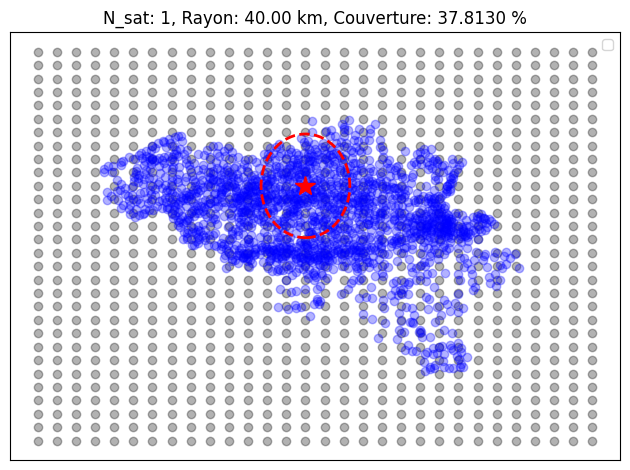

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


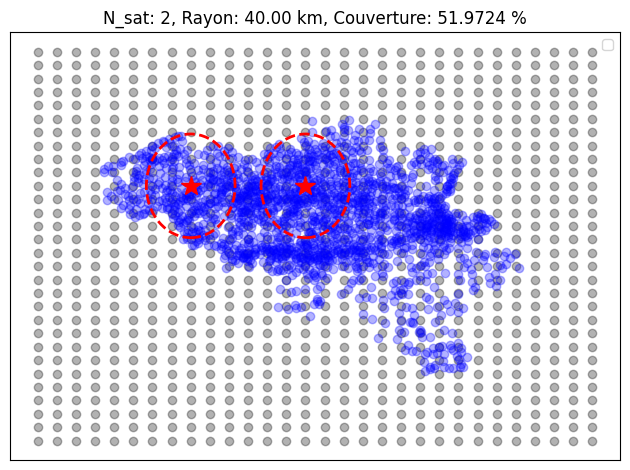

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


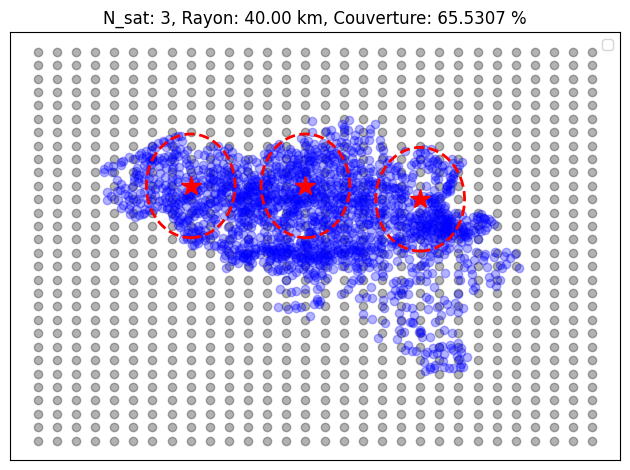

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


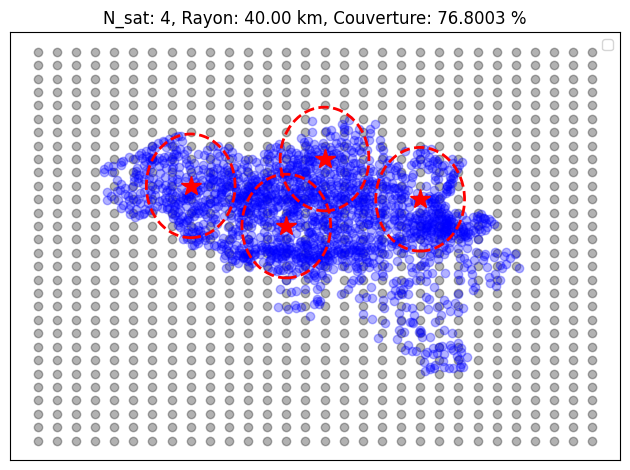

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


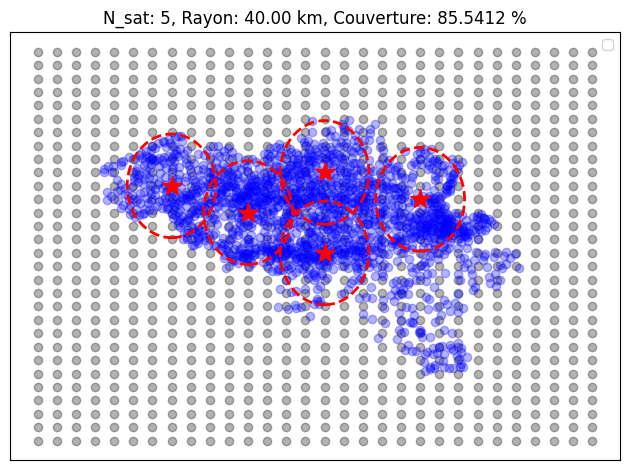

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


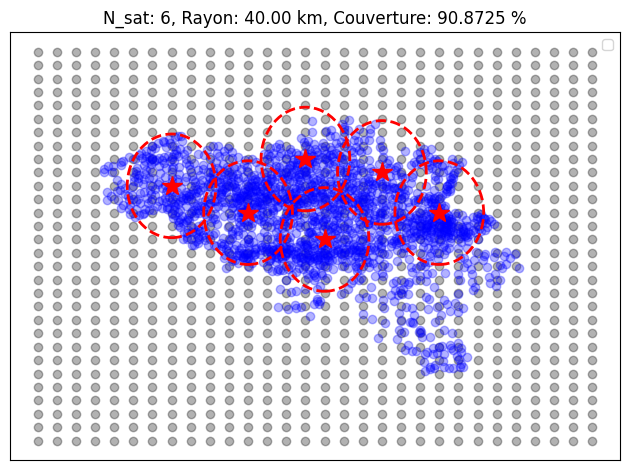

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


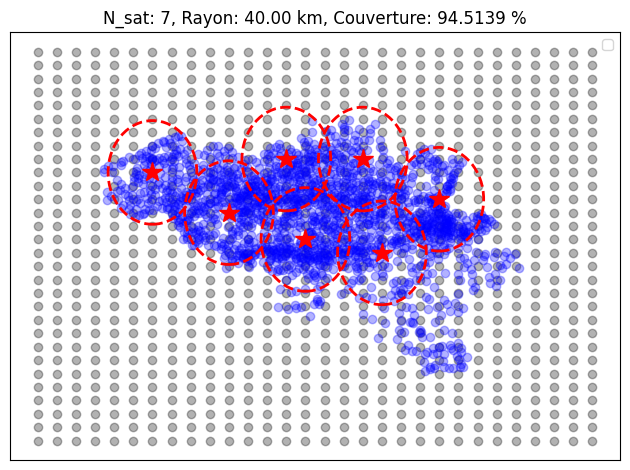

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


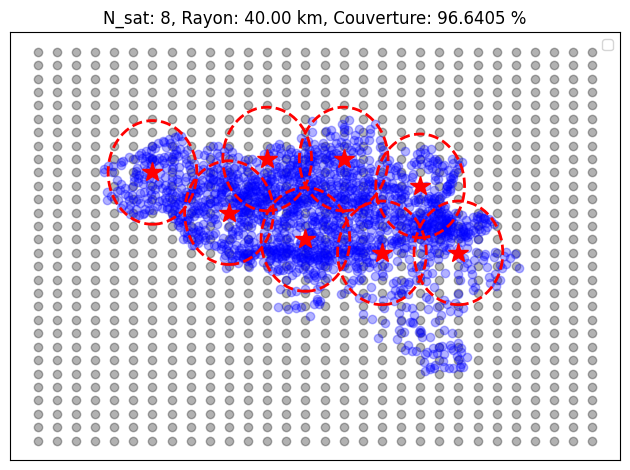

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


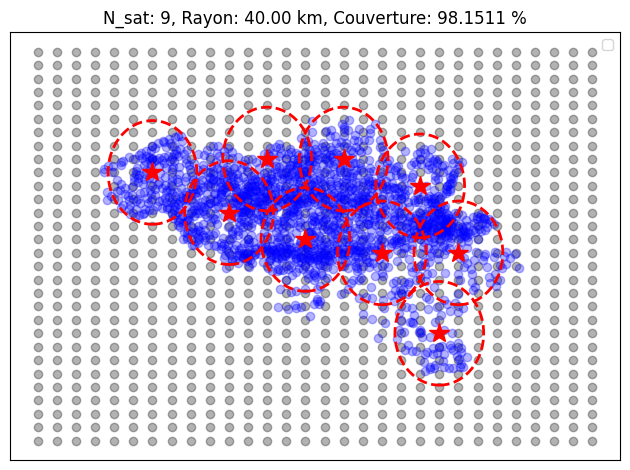

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


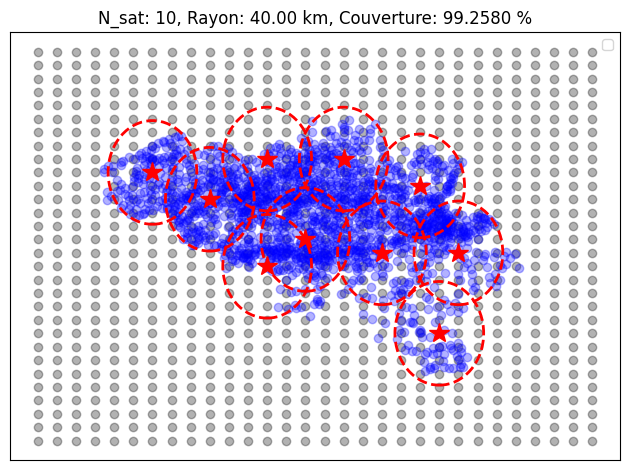

In [18]:
for N_sat, sat_positions, sol in zip(all_sats,save_x, save_sol):
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            plt.plot(grid[y][x][0], grid[y][x][1], "o", color="black", alpha=0.3)


    for i in range(len(cities)):
        plt.plot(cities[i][0], cities[i][1], "o", color="blue", alpha=0.3)


    #sat_positions = np.array(save_x[-1])
    indices_sat_positions = np.where(sat_positions > 1-1e-3)[0]
    #print("Positions satellites (id grid) :", indices_sat_positions)
    for i in indices_sat_positions:
        y,x = pre_processing.index_to_grid(i, len(grid), len(grid[0]))
        plt.plot(grid[y][x][0], grid[y][x][1], "*", color="red", markersize=15)
        circle = plt.Circle((grid[y][x][0], grid[y][x][1]), radius, color='red', fill=False, linestyle="--", zorder=2, linewidth=2)
        plt.gca().add_patch(circle)

    plt.legend()
    # Add the radius and number of satellites to the figure
    plt.title("N_sat: %d, Rayon: %.2f km, Couverture: %.4f %%" % (N_sat, 40, sol))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()


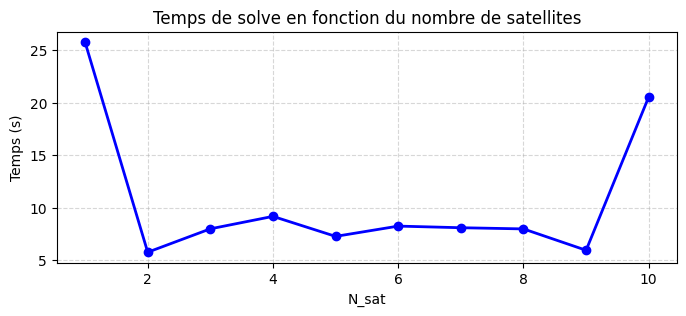

In [23]:
plt.figure(figsize=(8, 3))  # Set the figsize to make the plot wider
plt.plot(all_sats, save_times, color='blue', marker='o', linestyle='-', linewidth=2)
plt.xlabel('N_sat')
plt.ylabel('Temps (s)')
plt.title('Temps de solve en fonction du nombre de satellites')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
